### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import matplotlib.pyplot as plt

Ingreso total por cada tienda

In [ ]:
def sumar_total(lista):
  total = sum(lista)
  return total


In [ ]:
sumas_totales = {'Tienda 1':sumar_total(tienda['Precio']),
                 'Tienda 2':sumar_total(tienda2['Precio']),
                 'Tienda 3':sumar_total(tienda3['Precio']),
                 'Tienda 4':sumar_total(tienda4['Precio'])}

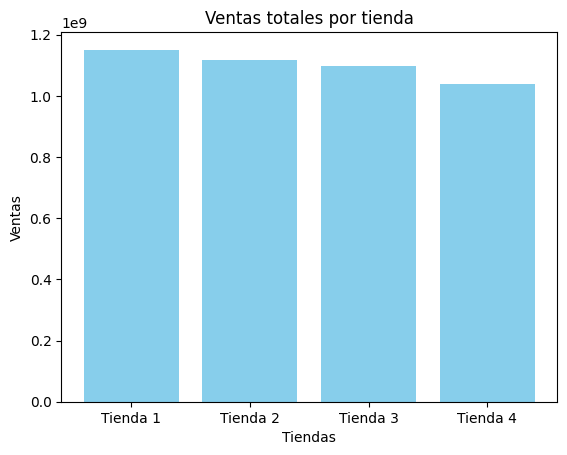

In [ ]:
plt.bar(sumas_totales.keys(), sumas_totales.values(), color='skyblue')

plt.title('Ventas totales por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ventas')

plt.show()

# 2. Ventas por categoría

In [ ]:
def contar (lista):
  ventas_por_categoria = {categoria: list(lista).count(categoria) for categoria in set(lista)}
  print(ventas_por_categoria)
  return(ventas_por_categoria)

In [ ]:
tienda1_categorias = contar(tienda['Categoría del Producto'])

{'Electrónicos': 448, 'Libros': 173, 'Instrumentos musicales': 182, 'Deportes y diversión': 284, 'Artículos para el hogar': 171, 'Juguetes': 324, 'Electrodomésticos': 312, 'Muebles': 465}


In [ ]:
tienda2_categorias = contar(tienda2['Categoría del Producto'])

{'Libros': 197, 'Instrumentos musicales': 224, 'Deportes y diversión': 275, 'Artículos para el hogar': 181, 'Juguetes': 313, 'Muebles': 442, 'Electrodomésticos': 305, 'Electrónicos': 422}


In [ ]:
tienda3_categorias = contar(tienda3['Categoría del Producto'])

{'Libros': 185, 'Instrumentos musicales': 177, 'Deportes y diversión': 277, 'Artículos para el hogar': 177, 'Juguetes': 315, 'Muebles': 499, 'Electrodomésticos': 278, 'Electrónicos': 451}


In [ ]:
tienda4_categorias = contar(tienda4['Categoría del Producto'])

{'Muebles': 480, 'Instrumentos musicales': 170, 'Deportes y diversión': 277, 'Artículos para el hogar': 201, 'Juguetes': 338, 'Electrodomésticos': 254, 'Libros': 187, 'Electrónicos': 451}


In [ ]:
tiendas = [tienda1_categorias, tienda2_categorias, tienda3_categorias, tienda4_categorias]

total = {}

for tienda in tiendas:
    for categoria, cantidad in tienda.items():
        if categoria in total:
            total[categoria] += cantidad
        else:
            total[categoria] = cantidad

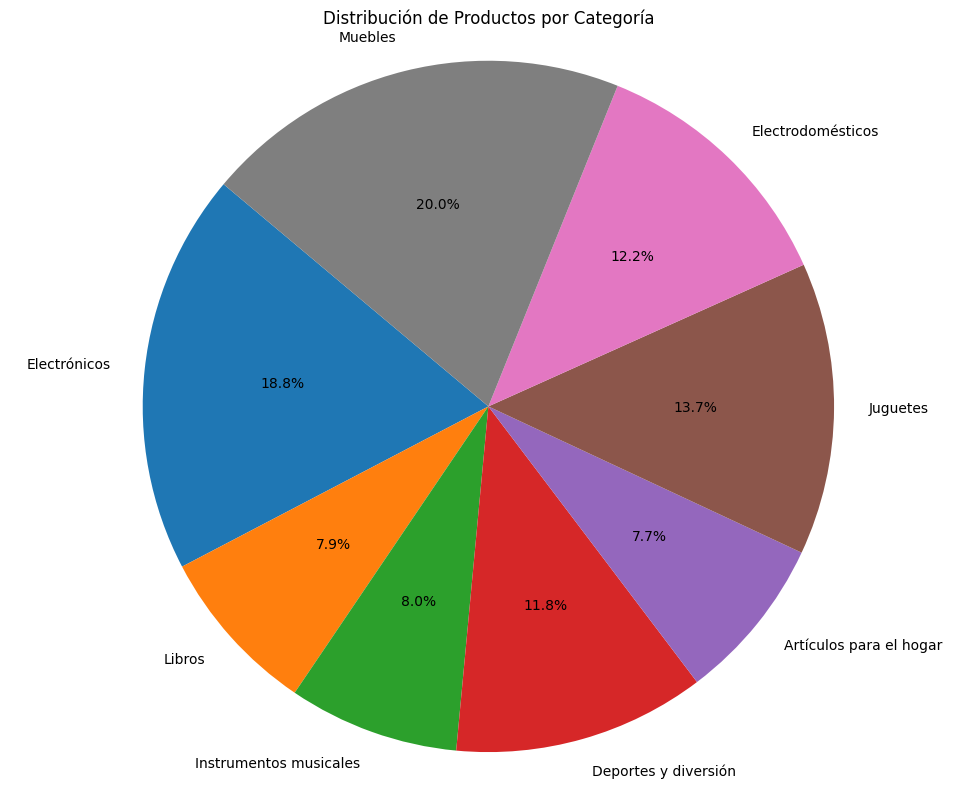

In [ ]:
categorias = list(total.keys())
cantidades = list(total.values())

plt.figure(figsize=(10, 8))
plt.pie(cantidades, labels=categorias, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Productos por Categoría')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
def promedio (lista):
  promedio = sum(lista) / len(lista)
  return(promedio)

In [ ]:
Calificiones = {'Tienda 1':promedio(tienda['Calificación']),
                 'Tienda 2':promedio(tienda2['Calificación']),
                 'Tienda 3':promedio(tienda3['Calificación']),
                 'Tienda 4':promedio(tienda4['Calificación'])}

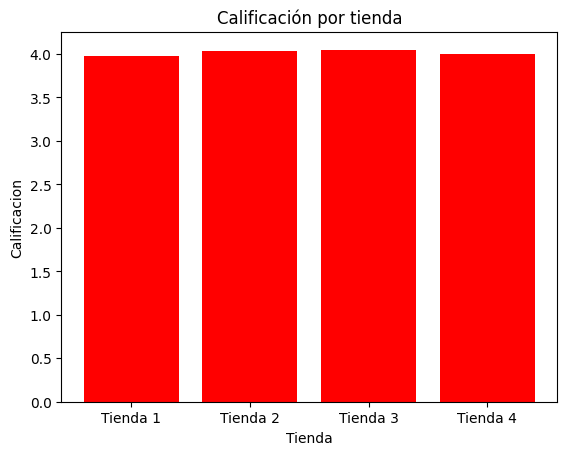

In [ ]:
plt.bar(Calificiones.keys(), Calificiones.values(), color='red')

plt.title('Calificación por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificacion')

plt.show()

# 4. Productos más y menos vendidos

In [ ]:
def promedio_vendidos (diccionario):
  promedio = sum(diccionario.values()) / len(diccionario)
  print(promedio)
  return promedio

In [ ]:
tupla_tienda1 = list(tienda1_categorias.items())
tupla_tienda2 = list(tienda2_categorias.items())
tupla_tienda3 = list(tienda3_categorias.items())
tupla_tienda4 = list(tienda4_categorias.items())


In [ ]:
def productos (tupla, promedio):
  mas_vendido = [(venta[0], venta[1] )for venta in tupla if venta[1] > promedio]
  print('Los productos mas vendidos son: ', mas_vendido)
  menos_vendidos = [(venta[0], venta[1]) for venta in tupla if venta[1] < promedio]
  print('Los productos menos vendidos son: ', menos_vendidos)
  return mas_vendido, menos_vendidos

In [ ]:
promedio1 = promedio_vendidos(tienda1_categorias)
productos(tupla_tienda1, promedio1)

294.875
Los productos mas vendidos son:  [('Electrónicos', 448), ('Juguetes', 324), ('Electrodomésticos', 312), ('Muebles', 465)]
Los productos menos vendidos son:  [('Libros', 173), ('Instrumentos musicales', 182), ('Deportes y diversión', 284), ('Artículos para el hogar', 171)]


([('Electrónicos', 448),
  ('Juguetes', 324),
  ('Electrodomésticos', 312),
  ('Muebles', 465)],
 [('Libros', 173),
  ('Instrumentos musicales', 182),
  ('Deportes y diversión', 284),
  ('Artículos para el hogar', 171)])

In [ ]:
promedio2 = promedio_vendidos(tienda2_categorias)
productos(tupla_tienda2, promedio2)

294.875
Los productos mas vendidos son:  [('Juguetes', 313), ('Muebles', 442), ('Electrodomésticos', 305), ('Electrónicos', 422)]
Los productos menos vendidos son:  [('Libros', 197), ('Instrumentos musicales', 224), ('Deportes y diversión', 275), ('Artículos para el hogar', 181)]


([('Juguetes', 313),
  ('Muebles', 442),
  ('Electrodomésticos', 305),
  ('Electrónicos', 422)],
 [('Libros', 197),
  ('Instrumentos musicales', 224),
  ('Deportes y diversión', 275),
  ('Artículos para el hogar', 181)])

In [ ]:
promedio3 = promedio_vendidos(tienda3_categorias)
productos(tupla_tienda3, promedio3)

294.875
Los productos mas vendidos son:  [('Juguetes', 315), ('Muebles', 499), ('Electrónicos', 451)]
Los productos menos vendidos son:  [('Libros', 185), ('Instrumentos musicales', 177), ('Deportes y diversión', 277), ('Artículos para el hogar', 177), ('Electrodomésticos', 278)]


([('Juguetes', 315), ('Muebles', 499), ('Electrónicos', 451)],
 [('Libros', 185),
  ('Instrumentos musicales', 177),
  ('Deportes y diversión', 277),
  ('Artículos para el hogar', 177),
  ('Electrodomésticos', 278)])

In [ ]:
promedio4 = promedio_vendidos(tienda4_categorias)
productos(tupla_tienda4, promedio4)

294.75
Los productos mas vendidos son:  [('Muebles', 480), ('Juguetes', 338), ('Electrónicos', 451)]
Los productos menos vendidos son:  [('Instrumentos musicales', 170), ('Deportes y diversión', 277), ('Artículos para el hogar', 201), ('Electrodomésticos', 254), ('Libros', 187)]


([('Muebles', 480), ('Juguetes', 338), ('Electrónicos', 451)],
 [('Instrumentos musicales', 170),
  ('Deportes y diversión', 277),
  ('Artículos para el hogar', 201),
  ('Electrodomésticos', 254),
  ('Libros', 187)])

# 5. Envío promedio por tienda

In [ ]:
costo_tienda1 = promedio(tienda['Costo de envío'])

In [ ]:
costo_tienda2 = promedio(tienda2['Costo de envío'])

In [ ]:
costo_tienda3 = promedio(tienda3['Costo de envío'])

In [ ]:
costo_tienda4 = promedio(tienda4['Costo de envío'])

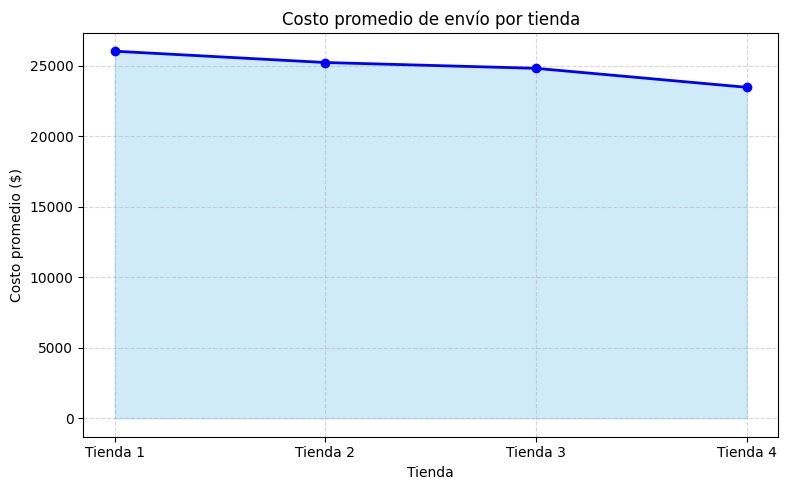

In [ ]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos = [costo_tienda1, costo_tienda2, costo_tienda3, costo_tienda4]

plt.figure(figsize=(8, 5))
plt.fill_between(tiendas, costos, color='skyblue', alpha=0.4)
plt.plot(tiendas, costos, marker='o', color='blue', linewidth=2)

plt.title('Costo promedio de envío por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo promedio ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Informe final
##Introduccion
El proposito general de este analisis fue extraer insight a traves de los datos proporcionados, ayudando a identificar el rendimiento de cada una de las tiendas y manejar posibles riesgos

##Desarrollo
Para este analisis se centro en 5 aspectos principales, comenzamos por el analisis de facturacion, en este de identificaron las ventas totales de las tiendas, luego pasamos a extraer las ventas por categorias en esta parte podemos ver la cantidad de productos que se venden en cada una de las tiendas, despues calculamos el promedio de calificacion recibida por parte de los usuarios para cada una de las tiendas, a continuacion, para identificar los productos mas y menos vendido de cada tienda, sacamos un promedio de todos los productos vendidos de cada una, con la finalidad de tener una frontera de decision respecto a que producto se venden mas que el resto y cuales no, por ultimo tenemos el costo promedio de envio de cada tienda

##Conclusion
